# Understand Naive Bayes Implementation ? 

## Gender Classification

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
data  = pd.read_csv("/kaggle/input/gender/gender_classification_v7.csv")

In [3]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


### Basic Analysis 

<Axes: xlabel='long_hair'>

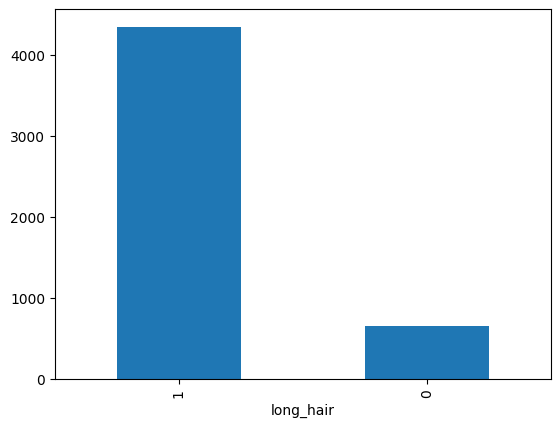

In [7]:
data['long_hair'].value_counts().plot(kind= 'bar')

In [15]:
corr = data.drop(columns = ['gender']).corr()

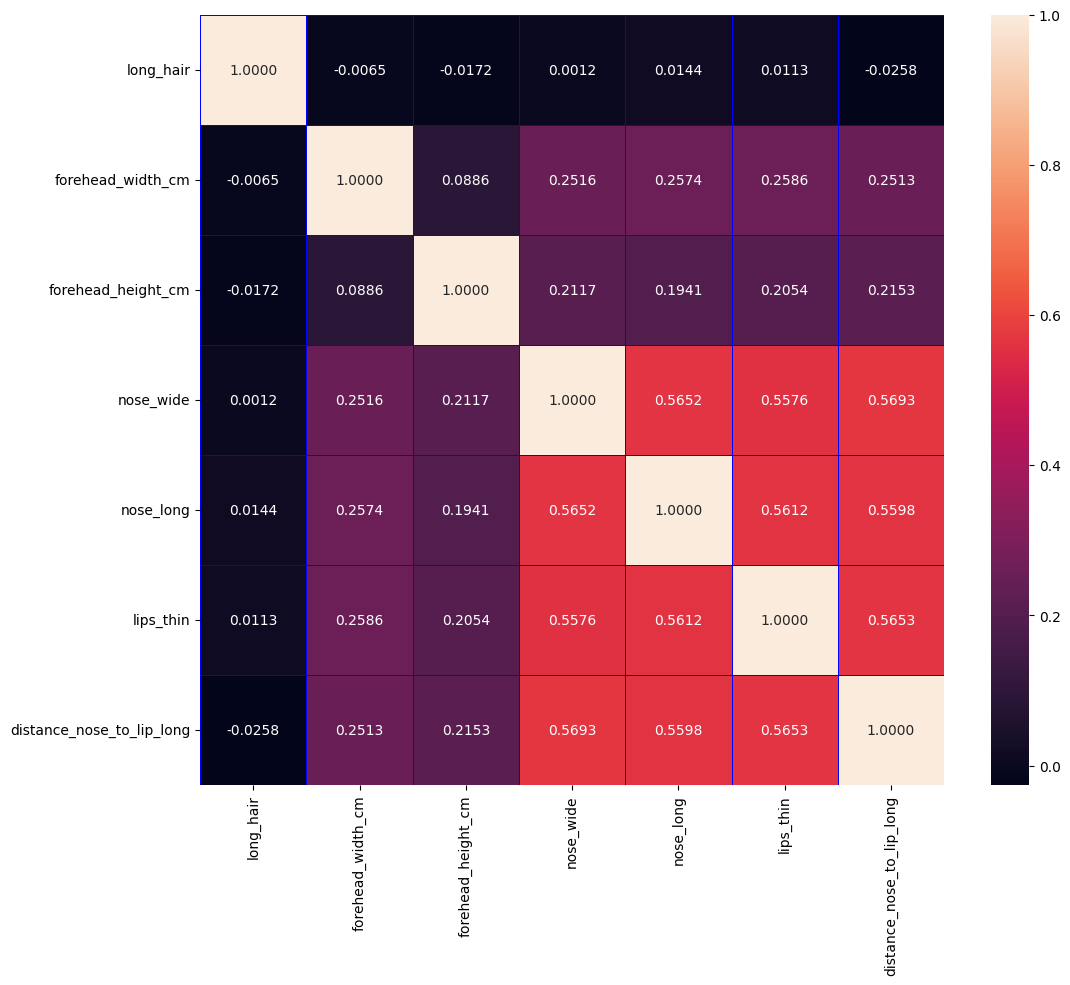

In [16]:
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(corr, annot = True, linewidths = 0.5, linecolor = "blue", fmt = ".4f", ax = ax)
plt.show()

- check for imbalance ? 

<Axes: xlabel='gender', ylabel='count'>

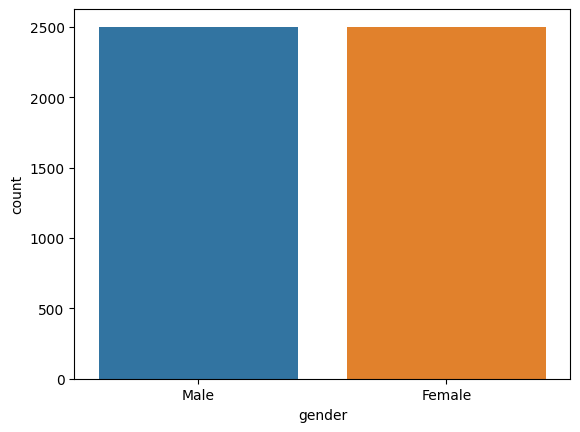

In [22]:
sns.countplot(x = 'gender' , data = data)

 - lets convert target feature to binary

In [26]:
data['gender'] = data['gender'].map({'Male' : 0 ,'Female':1})

In [28]:
data.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1
5,1,13.0,6.8,1,1,1,1,0
6,1,15.3,6.2,1,1,1,0,0
7,0,13.0,5.2,0,0,0,0,1
8,1,11.9,5.4,1,0,1,1,1
9,1,12.1,5.4,0,0,0,0,1


- Creating feature matrix and target vector 

In [30]:
X = data.drop(columns = 'gender')
y = data['gender'].values

In [32]:
print("Feature Matrix : ",X.shape)
print("Target Vector : ",y.shape)

Feature Matrix :  (5001, 7)
Target Vector :  (5001,)


In [38]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test =  train_test_split(X,y, test_size = 0.33)

# Applying Gaussion Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_classifier = GaussianNB()

naive_bayes_classifier.fit(X_train,y_train)

GaussianNB()

In [40]:
print("Score for Train Set : ",naive_bayes_classifier.score(X_train,y_train))

Score for Train Set :  0.9698507462686567


In [41]:
print("Score for Test Set : ",naive_bayes_classifier.score(X_test,y_test))

Score for Test Set :  0.9715324046032707
